In [88]:
import numpy as np
from scipy.stats import uniform, bootstrap, norm
import matplotlib.pyplot as plt

In [89]:
theta = 100
n = 100
beta = 0.95
alpha = 1 - beta
z_score = 1.96

# f Генерация выборки

In [90]:
np.random.seed(42)
sample = uniform.rvs(loc=theta, scale=theta, size=n)

sample_mean = np.mean(sample)
sample_std = np.std(sample, ddof=1)

margin_of_error = z_score * (sample_std / np.sqrt(n))
ci_normal = (sample_mean - margin_of_error, sample_mean + margin_of_error)


In [91]:
np.random.seed(42)
sample = uniform.rvs(loc=theta, scale=theta, size=n)

x_max = np.max(sample)

left  = x_max/(1 + ((1 + beta) / 2) ** (1 / n))
right = x_max/(1 + ((1 - beta) / 2) ** (1 / n))

print(f"Доверительный интервал: ({left}, {right})")
print(f"Pазмах: {right - left}")

Доверительный интервал: (99.35692273544554, 101.17648567228193)
Pазмах: 1.819562936836391


In [92]:
'''theta_1 = 2 * np.mean(sample) / 3

s = np.sqrt((np.sum([(x - np.mean(sample)) ** 2 for x in sample]))/(n-1))

left_a = theta_1 - 2 * s * 1.96 * np.sqrt(n - 1)/(3 * n)
right_a = theta_1 + 2 * s * 1.96 * np.sqrt(n - 1)/(3 * n)

print(f"Доверительный ас интервал: ({left_a}, {right_a})")
print(f"Pазмах: {right_a - left_a}")'''

'theta_1 = 2 * np.mean(sample) / 3\n\ns = np.sqrt((np.sum([(x - np.mean(sample)) ** 2 for x in sample]))/(n-1))\n\nleft_a = theta_1 - 2 * s * 1.96 * np.sqrt(n - 1)/(3 * n)\nright_a = theta_1 + 2 * s * 1.96 * np.sqrt(n - 1)/(3 * n)\n\nprint(f"Доверительный ас интервал: ({left_a}, {right_a})")\nprint(f"Pазмах: {right_a - left_a}")'

In [93]:
sample_mean = np.mean(sample)
sample_std = np.std(sample, ddof=1)
z_score = norm.ppf(1 - alpha / 2)  # Квантиль для 95% доверительного интервала

theta_estimate_mean = (2 / 3) * sample_mean
sigma_theta = theta_estimate_mean / np.sqrt(12)

# Асимптотический доверительный интервал
left_a = (2 / 3) * (sample_mean - z_score * sigma_theta / np.sqrt(n))
right_a = (2 / 3) * (sample_mean + z_score * sigma_theta / np.sqrt(n))

print(f"Доверительный ас интервал: ({left_a}, {right_a})")
print(f"Pазмах: {right_a - left_a}")

Доверительный ас интервал: (94.31508165694666, 101.7090174601479)
Pазмах: 7.393935803201245


# g Бутстраповский доверительный интервал

In [97]:
def theta_estimate(data):
    return (2 / 3) * np.mean(data)

bootstrap_ci = bootstrap((sample,), theta_estimate, confidence_level=beta, method='percentile')

# h Сравнение интервалов

In [98]:
print(f"Доверительный интервал: {left, right}")
print(f"Доверительный ас интервал: {left_a, right_a}")
print(f"Бутстраповский доверительный интервал: {bootstrap_ci.confidence_interval}")

Доверительный интервал: (99.35692273544554, 101.17648567228193)
Доверительный ас интервал: (94.31508165694666, 101.7090174601479)
Бутстраповский доверительный интервал: ConfidenceInterval(low=94.1425597790994, high=101.87996331154811)


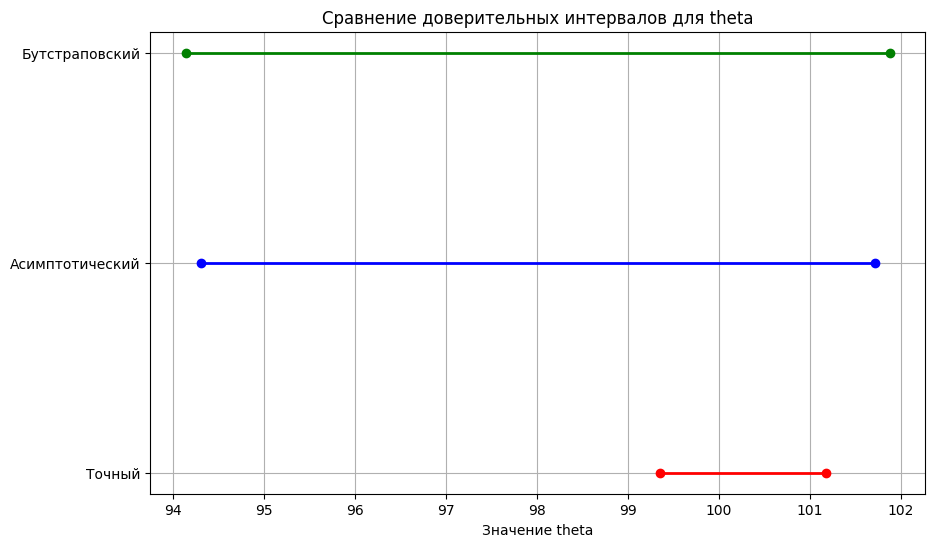

In [99]:
# Визуализация всех интервалов
plt.figure(figsize=(10, 6))

# Точный интервал
plt.plot([left, right], [1, 1], 'ro-', label='Точный интервал', linewidth=2)

# Асимптотический интервал
plt.plot([left_a, right_a], [2, 2], 'bo-', label='Асимптотический интервал', linewidth=2)

# Бутстраповский интервал
plt.plot(bootstrap_ci.confidence_interval, [3, 3], 'go-', label='Бутстраповский интервал', linewidth=2)

# Настройка графика
plt.yticks([1, 2, 3], ['Точный', 'Асимптотический', 'Бутстраповский'])
plt.xlabel('Значение theta')
plt.title('Сравнение доверительных интервалов для theta')
#plt.legend()
plt.grid(True)
plt.show()